# Note that this project is just an example, it's totally useless, because the features weren't chosen correctly, Please be warned.
# 这个项目的Features选择有问题，仅仅只作为演示Linear Regression的使用而存在，如果想要获得真正有用的模型，请严格考虑与公司相关的Features。

# Importing

In [417]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression
import file_operations
import os

Use to plot the data

In [418]:
import matplotlib.pyplot as plt

Use to make data look better

In [419]:
from matplotlib import style

Use to specify the style of the plot

In [420]:
style.use('ggplot')

In [421]:
import joblib

# Selecting Files

In [422]:
paths = file_operations.create_project_path("Project 2")

Project directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 2'
Project data directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 2\Data'
Project output directory created under 'd:\Important Files\Repositories\Machine-Learning-Project-related\Project 2\Output'


In [423]:
target_file_name = "K线导出_600873_日线数据.xlsx"
default_file_path = os.path.join(paths["data_dir"], target_file_name)
stock_df = file_operations.read_and_return_pd_df(default_file_path)
file_operations.change_head_to_ENG(stock_df)
file_operations.change_date_to_datetime(stock_df)
file_operations.change_numerical_data_to_float64(stock_df)
file_operations.change_secu_code_to_str(stock_df)
# Remove rows with NaN in the DATE column
stock_df.dropna(subset=['DATE'], inplace=True)
display(stock_df)
print(stock_df.info())
display(stock_df.tail())

The input file path is: 
d:\Important Files\Repositories\Machine-Learning-Project-related\Project 2\Data\K线导出_600873_日线数据.xlsx
Reading the input file...


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
0,600873,梅花生物,1995-02-17,0.83,0.95,0.83,0.90,NaN,NaN,11954900.0,69198000.0
1,600873,梅花生物,1995-02-20,0.88,0.90,0.86,0.87,-0.0287,-3.1825,3859200.0,22417000.0
2,600873,梅花生物,1995-02-21,0.87,0.89,0.85,0.89,0.0180,2.0616,2091500.0,12031000.0
3,600873,梅花生物,1995-02-22,0.89,1.32,0.88,1.26,0.3698,41.4993,16299000.0,118230000.0
4,600873,梅花生物,1995-02-23,1.21,1.51,1.18,1.51,0.2531,20.0730,18309200.0,158378000.0
...,...,...,...,...,...,...,...,...,...,...,...
6903,600873,梅花生物,2025-03-03,9.26,9.33,9.09,9.14,-0.1200,-1.2959,29737246.0,272629916.0
6904,600873,梅花生物,2025-03-04,9.14,9.27,9.10,9.23,0.0900,0.9847,21453826.0,197568732.0
6905,600873,梅花生物,2025-03-05,9.26,9.38,9.21,9.35,0.1200,1.3001,20302430.0,189325595.0
6906,600873,梅花生物,2025-03-06,9.44,9.72,9.39,9.66,0.3100,3.3155,45369066.0,436415844.0


<class 'pandas.core.frame.DataFrame'>
Index: 6908 entries, 0 to 6907
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   SECU_CODE   6908 non-null   object        
 1   SECU_NAME   6908 non-null   object        
 2   DATE        6908 non-null   datetime64[ns]
 3   OPENING     6908 non-null   float64       
 4   HIGHEST     6908 non-null   float64       
 5   LOWEST      6908 non-null   float64       
 6   CLOSING     6908 non-null   float64       
 7   CHANGE      6907 non-null   float64       
 8   PCT_CHANGE  6907 non-null   float64       
 9   VOLUME      6908 non-null   float64       
 10  AMOUNT      6908 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 647.6+ KB
None


,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT
6903,600873,梅花生物,2025-03-03,9.26,9.33,9.09,9.14,-0.12,-1.2959,29737246.0,272629916.0
6904,600873,梅花生物,2025-03-04,9.14,9.27,9.10,9.23,0.09,0.9847,21453826.0,197568732.0
6905,600873,梅花生物,2025-03-05,9.26,9.38,9.21,9.35,0.12,1.3001,20302430.0,189325595.0
6906,600873,梅花生物,2025-03-06,9.44,9.72,9.39,9.66,0.31,3.3155,45369066.0,436415844.0
6907,600873,梅花生物,2025-03-07,9.56,9.74,9.56,9.63,-0.03,-0.3106,23354586.0,225936876.0


# Calculating nessasary indexes
and add them to the stock_df dataframe

In [424]:
stock_df['HL_PCT'] = (stock_df['HIGHEST'] - stock_df['CLOSING']) / stock_df['CLOSING'] * 100.0
stock_df['PCT_change'] = (stock_df['CLOSING'] - stock_df['OPENING']) / stock_df['OPENING'] * 100.0
display(stock_df.head())

,SECU_CODE,SECU_NAME,DATE,OPENING,HIGHEST,LOWEST,CLOSING,CHANGE,PCT_CHANGE,VOLUME,AMOUNT,HL_PCT,PCT_change
0,600873,梅花生物,1995-02-17,0.83,0.95,0.83,0.90,NaN,NaN,11954900.0,69198000.0,5.555556,8.433735
1,600873,梅花生物,1995-02-20,0.88,0.90,0.86,0.87,-0.0287,-3.1825,3859200.0,22417000.0,3.448276,-1.136364
2,600873,梅花生物,1995-02-21,0.87,0.89,0.85,0.89,0.0180,2.0616,2091500.0,12031000.0,0.000000,2.298851
3,600873,梅花生物,1995-02-22,0.89,1.32,0.88,1.26,0.3698,41.4993,16299000.0,118230000.0,4.761905,41.573034
4,600873,梅花生物,1995-02-23,1.21,1.51,1.18,1.51,0.2531,20.0730,18309200.0,158378000.0,0.000000,24.793388


# Choose data columns we want and drop the rest

In [425]:
stock_df = stock_df[['DATE', 'CLOSING', 'HL_PCT', 'PCT_change', 'VOLUME']]
display(stock_df.head())

,DATE,CLOSING,HL_PCT,PCT_change,VOLUME
0,1995-02-17,0.90,5.555556,8.433735,11954900.0
1,1995-02-20,0.87,3.448276,-1.136364,3859200.0
2,1995-02-21,0.89,0.000000,2.298851,2091500.0
3,1995-02-22,1.26,4.761905,41.573034,16299000.0
4,1995-02-23,1.51,0.000000,24.793388,18309200.0


# Setting up a name for target column attribute

In [426]:
forecast_col = 'CLOSING'

# Tell the code how many days ahead will it be forcasting

In [427]:
forecast_out = int(math.ceil(0.0002*len(stock_df)))
print(len(stock_df), forecast_out)
# The 0.001 percentage of the data is 7 days, so we are predicting the closing price for the 7 days later

6908 2


# Managing the answers
The answer is the closing price 7(forcast_out) days later.

We then shift the data's targeted attributes up for 7 days and assign them into the 'Label' column.

In [428]:
stock_df['LABEL'] = stock_df[forecast_col].shift(-forecast_out)
print(forecast_out)
display(stock_df.tail(10))

2


,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,LABEL
6898,2025-02-24,9.22,1.409978,-0.539374,25047614.0,9.20
6899,2025-02-25,9.16,0.982533,-0.542888,18224499.0,9.31
6900,2025-02-26,9.20,1.195652,0.217865,20431326.0,9.26
6901,2025-02-27,9.31,0.000000,1.085776,24501664.0,9.14
6902,2025-02-28,9.26,1.511879,-0.430108,21684154.0,9.23
6903,2025-03-03,9.14,2.078775,-1.295896,29737246.0,9.35
6904,2025-03-04,9.23,0.433369,0.984683,21453826.0,9.66
6905,2025-03-05,9.35,0.320856,0.971922,20302430.0,9.63
6906,2025-03-06,9.66,0.621118,2.330508,45369066.0,NaN
6907,2025-03-07,9.63,1.142264,0.732218,23354586.0,NaN


# Spliting and Managing the features

Split the dataframe where X is the features and y is the answer

1. Remove answer(label) from X which is the features
2. Scale the features.
3. Store remoced answers into y
4. drop NaN values created by the shifting, since shift up will create a 7 days of label section NaN values, so make sure to drop these when you create 'Label' column. 
5. By doing these following two blocks, you split the original data into 4 parts: 

   1. (original days - forcast_out days)'s data without answers: `X`
   2. (original days - forcast_out days)'s answers without data: `y`
   3. (forcast_out days)'s data without answers: `X_lately`
stock_df.dropna(inplace = True)
   1. (forcast_out days)'s answers which are NaN values because of the shifting, and is removed by the `stock_df.dropna(inplace = True)` line following.

In [429]:
dates = stock_df['DATE'][:-forecast_out]
dates_lately = stock_df['DATE'][-forecast_out:]

display(dates)
display(dates_lately)

0      1995-02-17
1      1995-02-20
2      1995-02-21
3      1995-02-22
4      1995-02-23
          ...    
6901   2025-02-27
6902   2025-02-28
6903   2025-03-03
6904   2025-03-04
6905   2025-03-05
Name: DATE, Length: 6906, dtype: datetime64[ns]

6906   2025-03-06
6907   2025-03-07
Name: DATE, dtype: datetime64[ns]

In [430]:
X = np.array(stock_df.drop(['LABEL', 'DATE'], axis = 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

display(X)
display(X_lately)
display(stock_df.tail(10))

array([[-1.10078168,  1.80479815,  2.95985767, -0.1142554 ],
       [-1.11263191,  0.75618688, -0.44569781, -0.39564814],
       [-1.10473175, -0.95972247,  0.77673605, -0.45709038],
       ...,
       [ 2.15408068,  0.07470428, -0.50246812,  0.50382865],
       [ 2.18963136, -0.74407189,  0.30908449,  0.21591108],
       [ 2.23703227, -0.80006032,  0.30454363,  0.17589052]],
      shape=(6906, 4))

array([[ 2.18963136, -0.74407189,  0.30908449,  0.21591108],
       [ 2.23703227, -0.80006032,  0.30454363,  0.17589052]])

,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,LABEL
6898,2025-02-24,9.22,1.409978,-0.539374,25047614.0,9.20
6899,2025-02-25,9.16,0.982533,-0.542888,18224499.0,9.31
6900,2025-02-26,9.20,1.195652,0.217865,20431326.0,9.26
6901,2025-02-27,9.31,0.000000,1.085776,24501664.0,9.14
6902,2025-02-28,9.26,1.511879,-0.430108,21684154.0,9.23
6903,2025-03-03,9.14,2.078775,-1.295896,29737246.0,9.35
6904,2025-03-04,9.23,0.433369,0.984683,21453826.0,9.66
6905,2025-03-05,9.35,0.320856,0.971922,20302430.0,9.63
6906,2025-03-06,9.66,0.621118,2.330508,45369066.0,NaN
6907,2025-03-07,9.63,1.142264,0.732218,23354586.0,NaN


## Removing NaN values caused by the shifting

In [431]:
stock_df.dropna(inplace = True)

In [432]:
y = np.array(stock_df['LABEL'])
display(y)
display(stock_df.tail(10))

array([0.89, 1.26, 1.51, ..., 9.35, 9.66, 9.63], shape=(6906,))

,DATE,CLOSING,HL_PCT,PCT_change,VOLUME,LABEL
6896,2025-02-20,9.41,0.743889,-0.423280,16816379.0,9.22
6897,2025-02-21,9.28,1.616379,-1.276596,30924710.0,9.16
6898,2025-02-24,9.22,1.409978,-0.539374,25047614.0,9.20
6899,2025-02-25,9.16,0.982533,-0.542888,18224499.0,9.31
6900,2025-02-26,9.20,1.195652,0.217865,20431326.0,9.26
6901,2025-02-27,9.31,0.000000,1.085776,24501664.0,9.14
6902,2025-02-28,9.26,1.511879,-0.430108,21684154.0,9.23
6903,2025-03-03,9.14,2.078775,-1.295896,29737246.0,9.35
6904,2025-03-04,9.23,0.433369,0.984683,21453826.0,9.66
6905,2025-03-05,9.35,0.320856,0.971922,20302430.0,9.63


You can see they have the same shape in axis = 1.

# Split data into traning and testing.

Set shuffle = False because by default it will shuffle and this will mess up the date relationships which is something we want

In [433]:
X_train, X_test, y_train, y_test, dates_train, dates_test = model_selection.train_test_split(X, y, dates, test_size = 0.2)

# Training the model(classifier)
`n_jobs = -1` means to run using as many threads as possible, make it faster.

In [434]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Avoid division by zero with a small epsilon
epsilon = 1e-8

relative_error = np.abs(predictions - y_test) / (np.abs(y_test) + epsilon)
custom_accuracy = np.mean(relative_error < 0.01)

print(f"Forcast out of {forecast_out} days. ")
print("Custom Accuracy (relative error < 1%):", custom_accuracy)

Forcast out of 2 days. 
Custom Accuracy (relative error < 1%): 0.26845151953690305


In [435]:
df_relative_error = pd.DataFrame({
    "Date": dates_test, 
    "Relative_Error": relative_error
})
sorted_error_df = df_relative_error.sort_values(by = "Date")
display(sorted_error_df)

,Date,Relative_Error
0,1995-02-17,0.023077
8,1995-03-01,0.071999
10,1995-03-03,0.178251
14,1995-03-09,0.028296
16,1995-03-13,0.071043
...,...,...
6885,2025-02-05,0.012595
6886,2025-02-06,0.001112
6892,2025-02-14,0.036785
6893,2025-02-17,0.007548


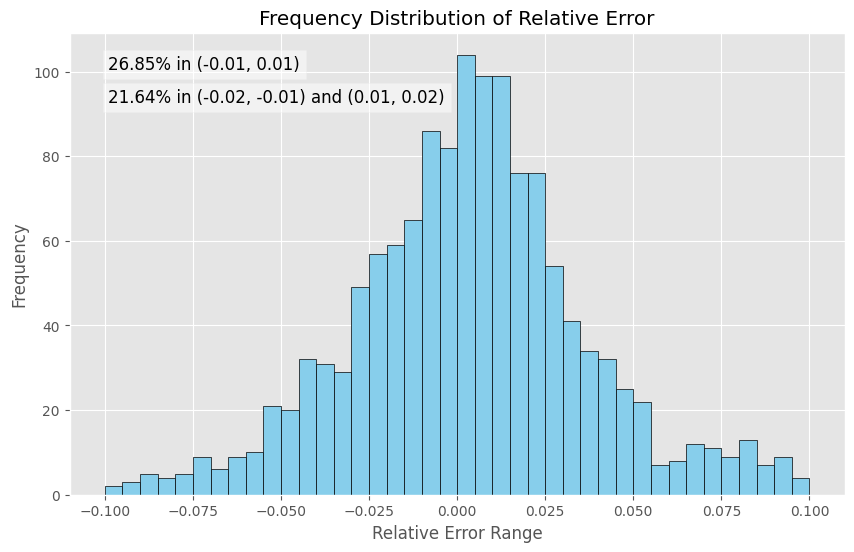

In [436]:
# Compute the signed relative error: (prediction - actual) / (actual + epsilon)
relative_error_signed = (predictions - y_test) / (y_test + epsilon)

# Create bins from -0.1 to 0.1 with a step of 0.005
bins = np.arange(-0.1, 0.1 + 0.005, 0.005)

mask = (relative_error_signed >= -0.01) & (relative_error_signed <= 0.01)
count_in_range = np.sum(mask)
total_count = len(relative_error_signed)
percentage_in_range = (count_in_range / total_count) * 100

mask_range2 = ((relative_error_signed >= -0.02) & (relative_error_signed < -0.01)) | ((relative_error_signed > 0.01) & (relative_error_signed <= 0.02))
count_in_range2 = np.sum(mask_range2)
percentage_in_range2 = (count_in_range2 / total_count) * 100

plt.figure(figsize = (10, 6))
plt.hist(relative_error_signed.flatten(), bins = bins, color = 'skyblue', edgecolor = 'black')
plt.xlabel("Relative Error Range")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Relative Error")
tag_text = f"{percentage_in_range:.2f}% in (-0.01, 0.01)"
plt.text(0.05, 0.95, tag_text, transform = plt.gca().transAxes, fontsize = 12, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.5))
tag_text2 = f"{percentage_in_range2:.2f}% in (-0.02, -0.01) and (0.01, 0.02)"
plt.text(0.05, 0.88, tag_text2, transform = plt.gca().transAxes, fontsize = 12, verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.5))
plt.show()

# Saving the model
And load the model:

In [437]:
joblib.dump(clf, 'stock_prediction_model.pkl')
loaded_model = joblib.load('stock_prediction_model.pkl')

Store the loaded model into clf for education purposes

In [438]:
clf = loaded_model

# Getting the prediction for the shifted days that has no answers.
And print the result:

In [439]:
forecast_set = clf.predict(X_lately)
print("Forecast result: " + str(forecast_set) + "\n" + "With the accuracy of: " + str(custom_accuracy) + "\n" + "Forecast out of " + str(forecast_out) + " days.")

Forecast result: [9.2217179  9.34190859]
With the accuracy of: 0.26845151953690305
Forecast out of 2 days.


# Merging all sections together for matplot lib

1. dates_train
2. dates_test
3. dates_lately

This being the X axis

and


1. y_train
2. y_test
3. forcast out

This being the Y axis

In [440]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
forecast_set = forecast_set.reshape(-1, 1)

dates_train = np.array(dates_train).reshape(-1, 1)
dates_test  = np.array(dates_test).reshape(-1, 1)
dates_lately = np.array(dates_lately).reshape(-1, 1)

all_dates = np.vstack((dates_train, dates_test, dates_lately)).flatten()
all_targets = np.vstack((y_train, y_test, forecast_set)).flatten()

df_combined = pd.DataFrame({
    "Date": all_dates,
    "Closing Price": all_targets
})

df_combined.set_index('Date', inplace = True)
df_combined.sort_values(by = 'Date', inplace = True)
display(df_combined)


,Closing Price
Date,
1995-02-17,0.890000
1995-02-20,1.260000
1995-02-21,1.510000
1995-02-22,1.270000
1995-02-23,1.320000
...,...
2025-03-03,9.350000
2025-03-04,9.660000
2025-03-05,9.630000


## Using matplotlib to Show the graph

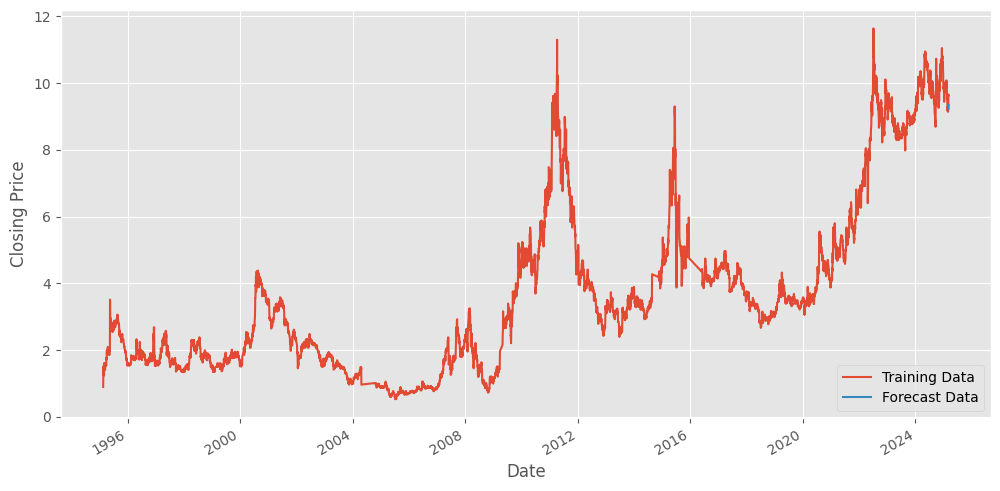

In [441]:
plt.figure(figsize = (12, 6))
df_combined['Closing Price'][:-forecast_out].plot(label = 'Training Data')
df_combined['Closing Price'][-forecast_out:].plot(label = 'Forecast Data')
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [442]:
df_combined.info()
df_combined.columns
df_combined.describe()
df_combined.sort_values(by = 'Closing Price', ascending = False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6908 entries, 1995-02-17 to 2025-03-07
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  6908 non-null   float64
dtypes: float64(1)
memory usage: 107.9 KB


,Closing Price
Date,
2022-07-05,11.64
2022-07-06,11.55
2011-04-07,11.30
2024-12-10,11.05
2022-07-08,11.03
...,...
2005-07-08,0.54
2005-07-06,0.54
2005-07-14,0.53
